<a href="https://colab.research.google.com/github/farahqotrunnada/DTI/blob/main/Clustering/Market_Segmentation_with_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bio-informatics, data compression, and computer graphics.

# Loading and getting to know the dataset

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

#Makes graph display in notebook
%matplotlib inline   

#ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn()

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/farahqotrunnada/DTI/main/Clustering/Mall_Customers.csv')
display(df.head())
display(df.describe())
display(df.info())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

*There is no null data*

# Data Visualization

## Is it good idea ignoring gender?

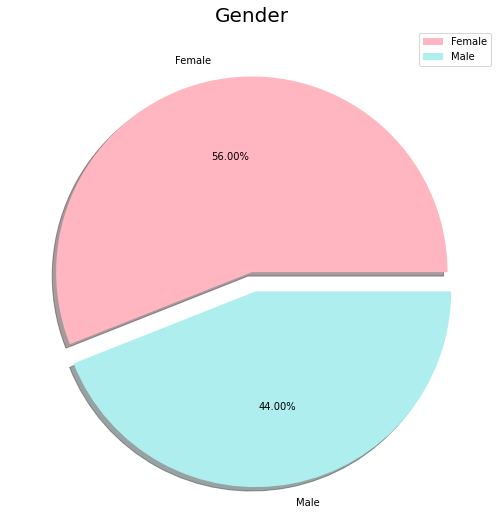

In [ ]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightpink', 'paleturquoise']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

*Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.*

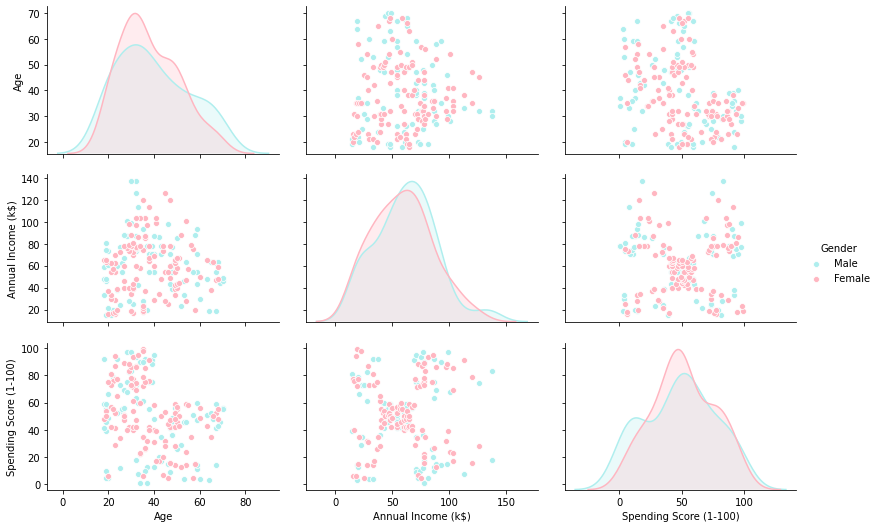

In [ ]:
# Let's see our data in a detailed way with pairplot
palette=sns.set_palette(sns.color_palette(['paleturquoise','lightpink']))
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

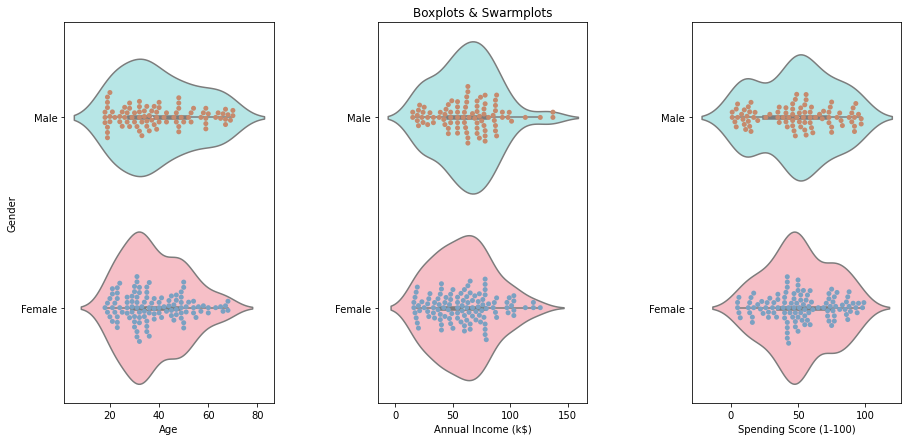

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = palette)
    sns.swarmplot(x = cols , y = 'Gender' , data = df,palette='twilight_shifted_r')
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

*In spite of the preceeding plot, there's just slightly different between male and female about explaining customer segmentation from variation of income-spending score. Therefore, we can take segmentation without involving gender* 

## Distribution of feature without involving gender

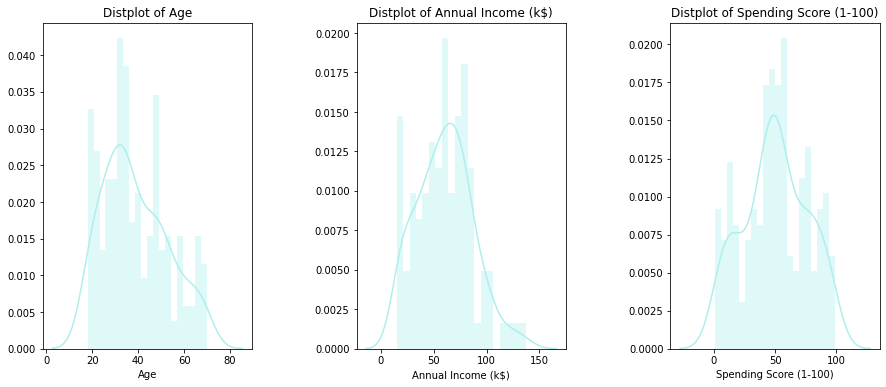

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

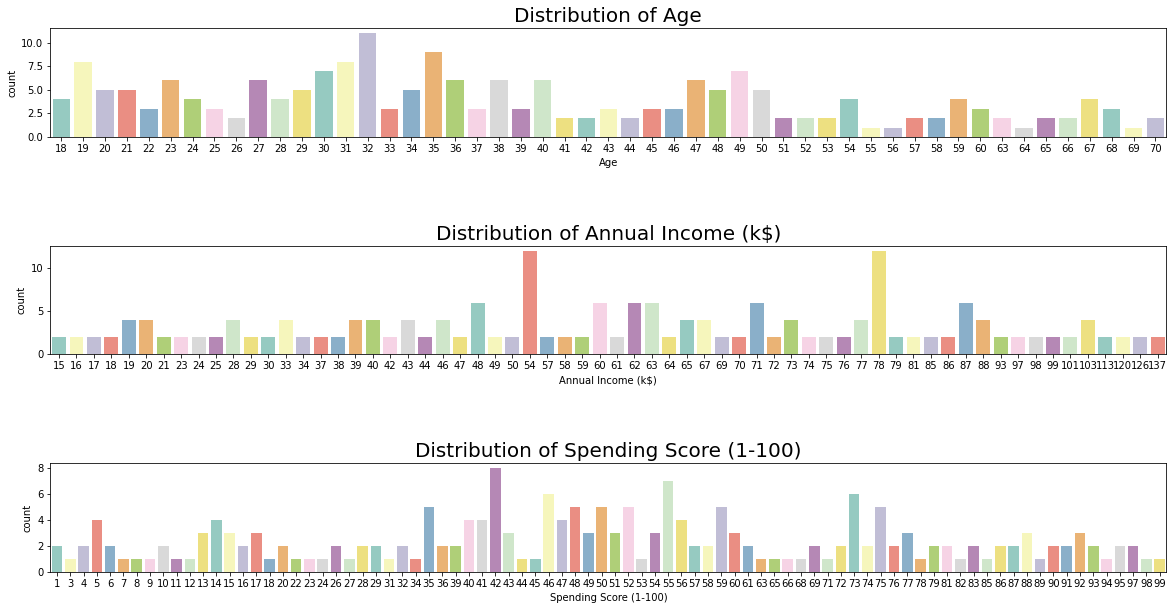

In [ ]:
plt.figure(1 , figsize = (20, 10))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(3 , 1, n)
    plt.subplots_adjust(hspace =1 , wspace = 0.5)
    sns.countplot(df[x], palette = 'Set3')
    plt.title('Distribution of {}'.format(x),fontsize = 20)
plt.show()

*Here, In the above Plots we can see the Distribution pattern of Annual Income, Spending score and Age, By looking at the plots, we can infer:*

*From distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.*

*Digging more about the spending score that is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.*

*Lastly, for the age we can say that the most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people.*

## Standardization to reduce the weight of higher number

In [ ]:
from sklearn.preprocessing import StandardScaler
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
scaler = StandardScaler() 
X2 = scaler.fit_transform(X2)

# K-Means Clustering

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

## Segmentation using Annual Income and Spending Score

**Search for the Optimum Number of Clusters (k)**

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1032: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  "cluster. Using 'full' instead.", RuntimeWarning)


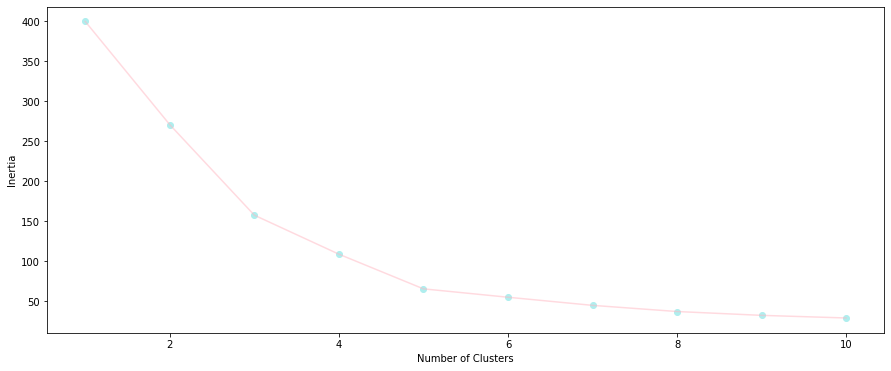

In [ ]:
# Elbow Method
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

*Now if we observe the point after which there isn’t a sudden change in WCSS in K=5. So we will choose K=5 as an appropriate number of clusters which matched the clusters we had before applying the algorithm*

In [ ]:
# Silhoutte Method
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X2)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X2, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.29512063001659344
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.4939069237513199
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5377141165734254
For n_clusters=7, The Silhouette Coefficient is 0.5281492781108291
For n_clusters=8, The Silhouette Coefficient is 0.45317028376017787
For n_clusters=9, The Silhouette Coefficient is 0.459413327784715
For n_clusters=10, The Silhouette Coefficient is 0.449093473373472


*This confirms our conclusion about the appropriate number of cluster that is the most approching 1 of Silhouette Coefficient is n_clusters=5*

**Visualizing the segmentation**

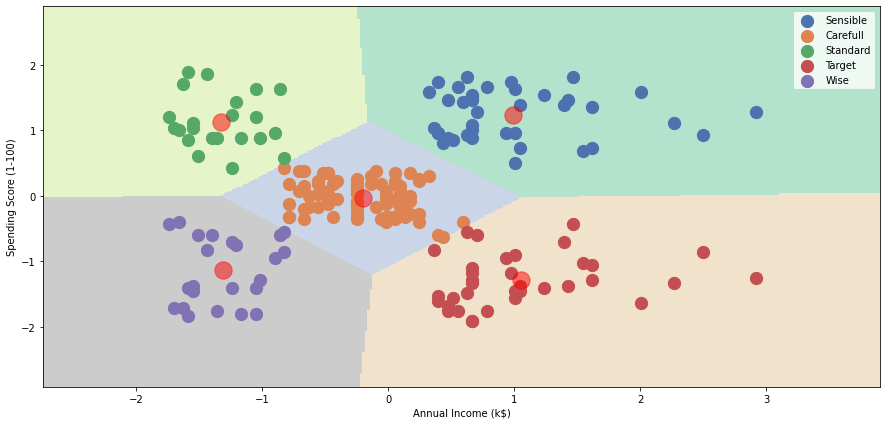

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
pred = algorithm.predict(X2)
centroids2 = algorithm.cluster_centers_
sns.set_palette(sns.color_palette('deep'))
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
labelling = ["Sensible","Carefull", "Standard", "Target","Wise"]

for i in range(5):
    plt.scatter(X2[pred == i, 0], X2[pred == i, 1],s=150, label = labelling[i])
    
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.legend()
plt.show()

**Plot on real axes for better analysis taking**

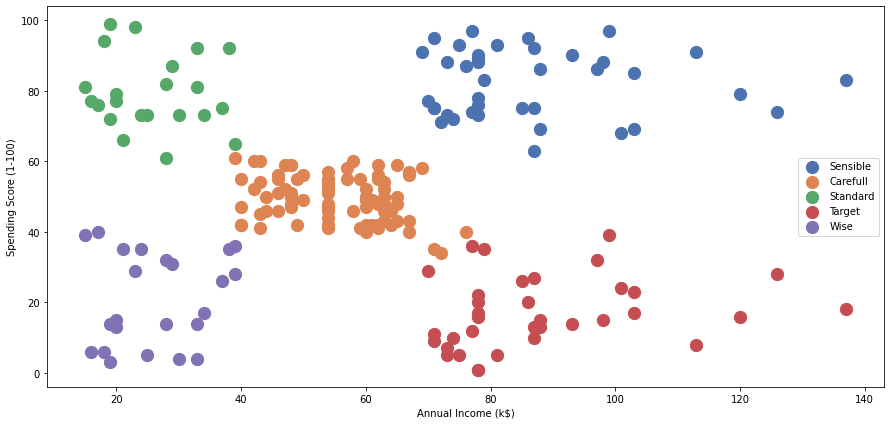

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
X1=df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
for i in range(5):
    plt.scatter(X1[pred == i, 0], X1[pred == i, 1],s=150, label = labelling[i])
    
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.legend()
plt.show()

# Hierarchical Clustering

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

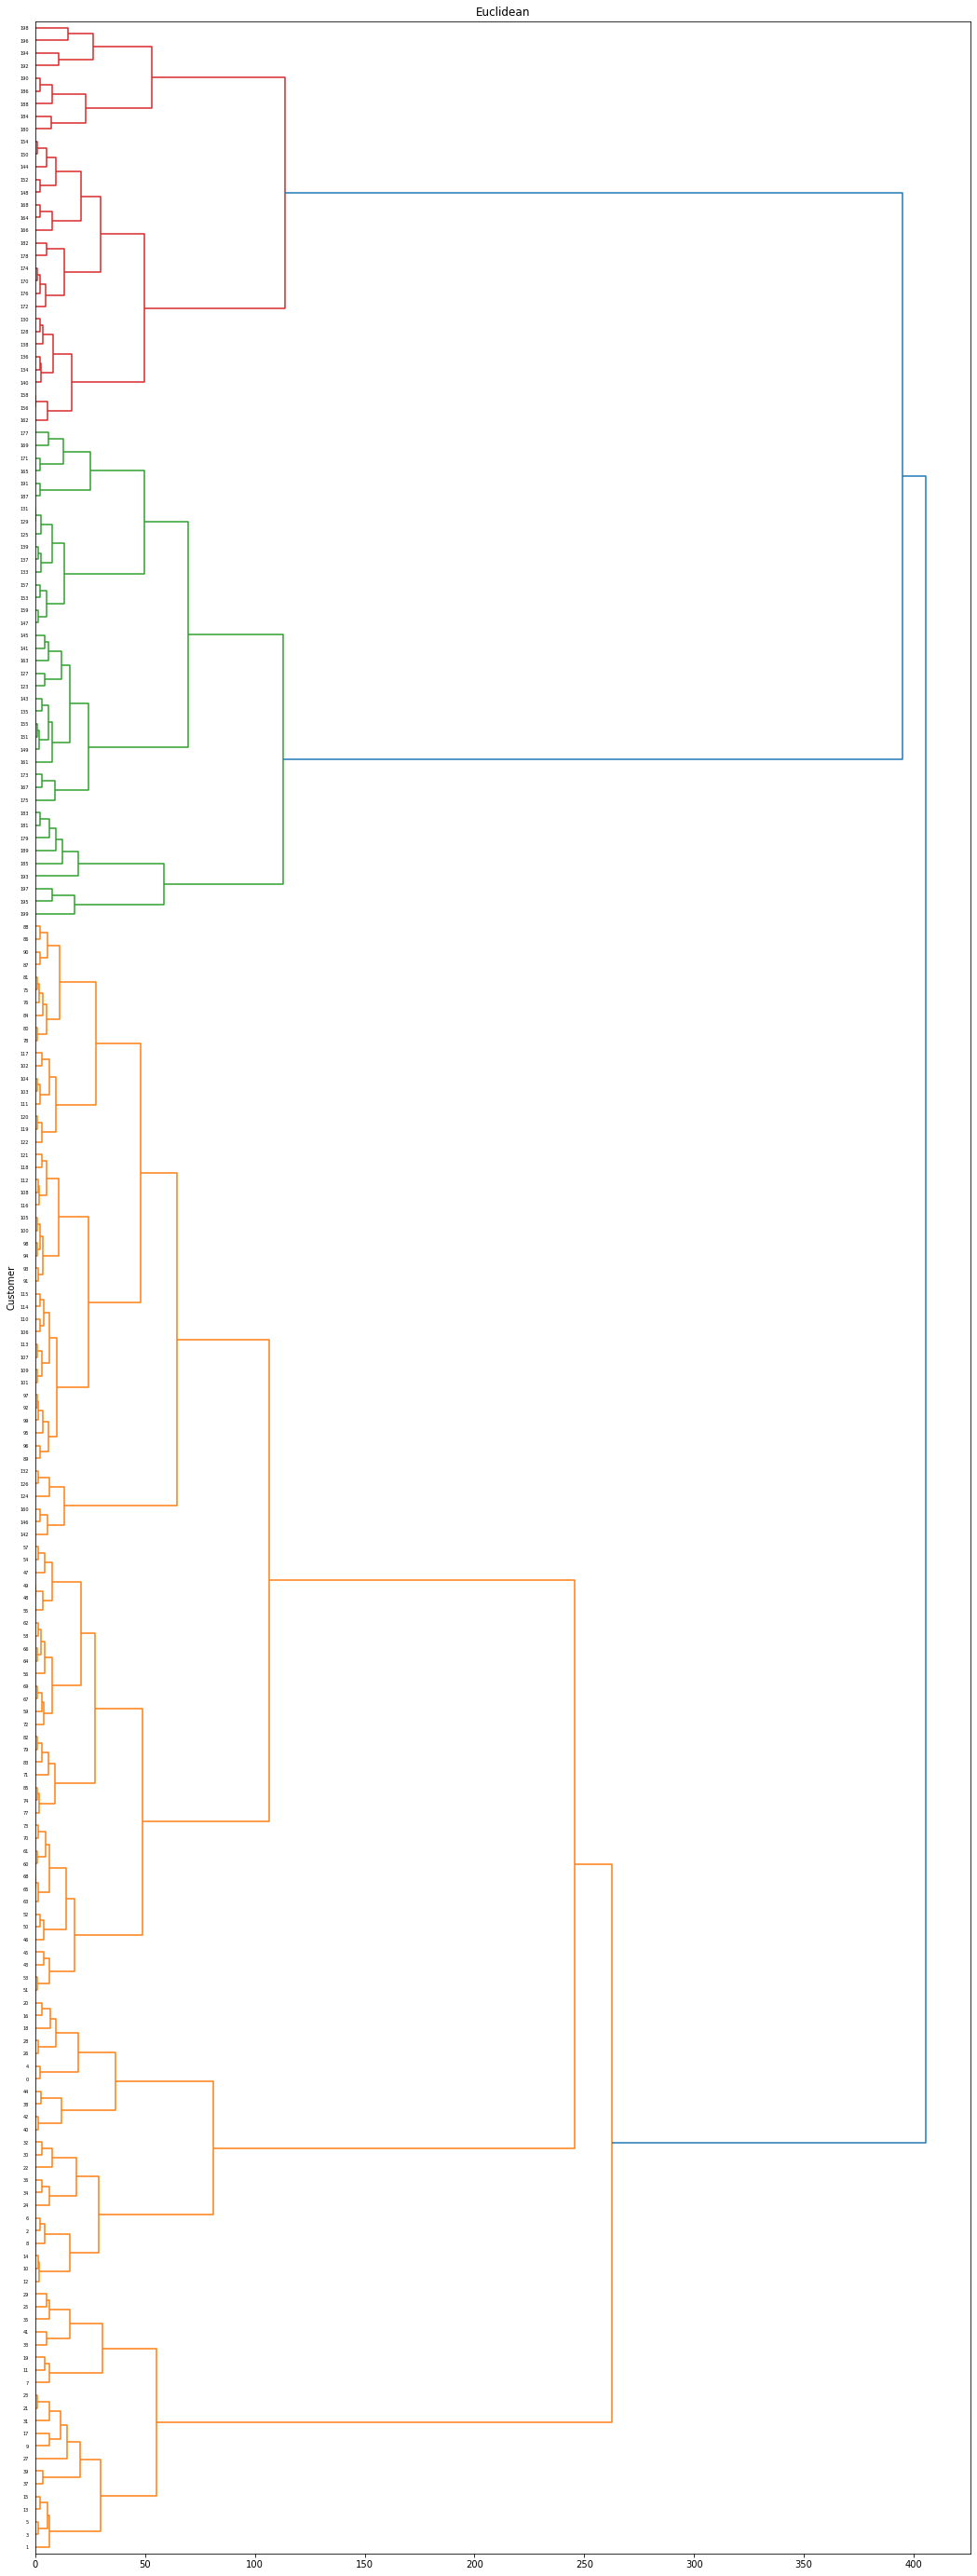

In [ ]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(18, 50))
dend = sch.dendrogram(sch.linkage(df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values, method='ward'),orientation='right')
plt.ylabel('Customer')
plt.title('Euclidean')
plt.show()

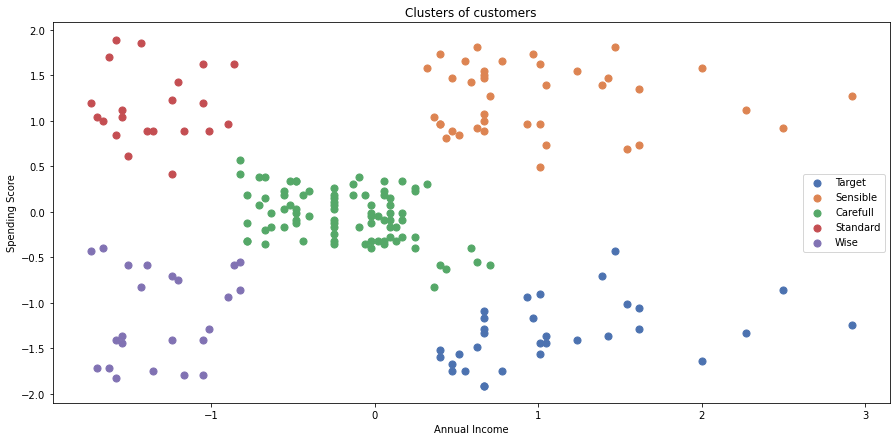

In [ ]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(X2)

# Visualising Clusters for k=5
plt.figure(figsize=(15, 7))
labelling=["Target","Sensible", "Carefull", "Standard","Wise"]
for i in range(5):
    plt.scatter(X2[hcluster== i, 0], X2[hcluster == i, 1],s=50, label = labelling[i])

plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Density Based Clustering (DBSCAN)

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this part, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

**Modeling**

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points
Epsilon determine a specified radius that if includes enough number of points within, we call it dense area
minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


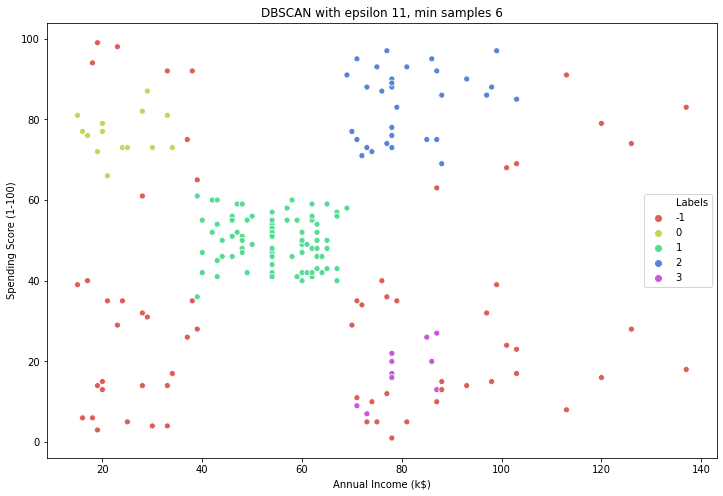

In [ ]:
from sklearn.cluster import DBSCAN 
X=df[['Annual Income (k$)' , 'Spending Score (1-100)','Age']].iloc[: , :]
db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

As we can see DBSCAN doesn't perform very well because the density in our data is not that strong. Label -1 means outliers so it will appear most as outliers. We may have performed better if we had had a bigger data.

# Mean Shift Algorithm

MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass bandwidth=22.21702645600276 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


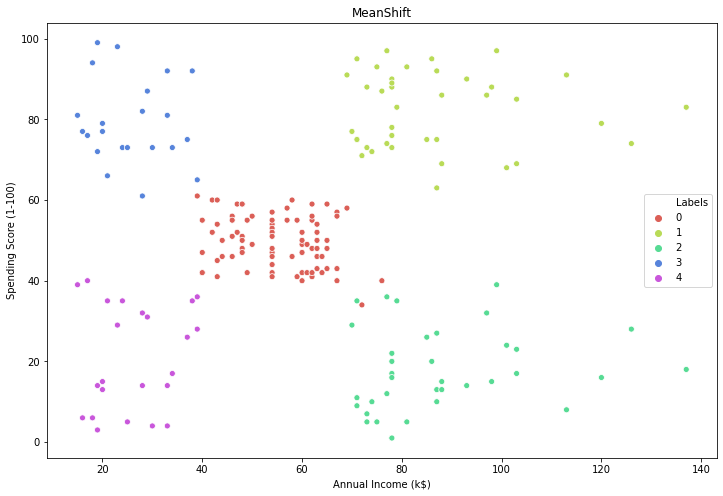

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

# Clustering for three features

**WCSS**

In [19]:
X=df[['Age','Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :]
sns.set_palette(sns.color_palette(['paleturquoise','lightpink']))
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 500, n_init = 10, random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
fig = go.Figure(data = go.Scatter(x = [1,2,3,4,5,6,7,8,9,10], y = wcss))

fig.update_layout(title='WCSS vs. Cluster number',
                   xaxis_title='Clusters',
                   yaxis_title='WCSS')
fig.show()

In [20]:
# Silhoutte Method
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.2546889804974141
For n_clusters=3, The Silhouette Coefficient is 0.3839349967742105
For n_clusters=4, The Silhouette Coefficient is 0.40546302077733304
For n_clusters=5, The Silhouette Coefficient is 0.44428597560893024
For n_clusters=6, The Silhouette Coefficient is 0.4523443947724053
For n_clusters=7, The Silhouette Coefficient is 0.43975096350717857
For n_clusters=8, The Silhouette Coefficient is 0.42627498428462474
For n_clusters=9, The Silhouette Coefficient is 0.3982668308742979
For n_clusters=10, The Silhouette Coefficient is 0.3833745859240089


In [21]:
kmeans = KMeans(n_clusters = 6, init="k-means++", max_iter = 500, n_init = 10, random_state = 123)
identified_clusters = kmeans.fit_predict(X)
dataset2=df.drop(['CustomerID'], axis = 1)
data_with_clusters = dataset2.copy()
data_with_clusters['Cluster'] = identified_clusters

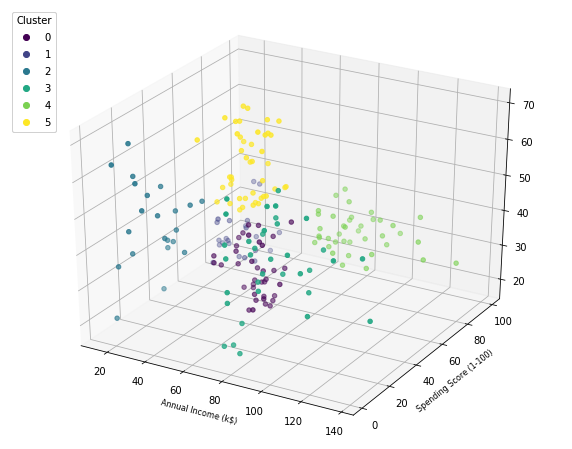

In [22]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')
scatter=ax.scatter(data_with_clusters['Annual Income (k$)'],data_with_clusters['Spending Score (1-100)'],data_with_clusters['Age'],c=data_with_clusters['Cluster'],label=data_with_clusters['Cluster']);
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Cluster")
ax.add_artist(legend1)

plt.xlabel('Annual Income (k$)',fontsize=8)
plt.ylabel('Spending Score (1-100)',fontsize=8)

plt.show()

*It can flexibly zoom in or out*

# Conclusion

After all, generally we have clustering with five number of groups following

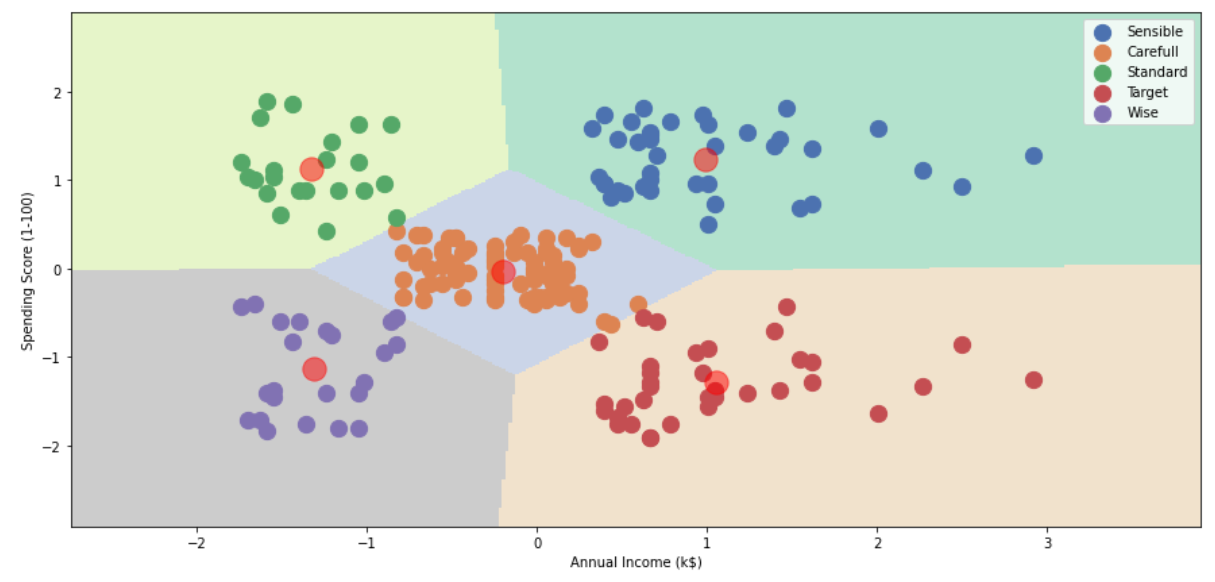!

We can see that the mall customers can be broadly grouped into 5 groups based on their purchases made in the mall.

In cluster 'wise' we can see people have low annual income and low spending scores, 
this is quite reasonable as people having low salaries prefer to buy less, in fact, 
these are the wise people who know how to spend and save money.
The shops/mall will be least interested in people belonging to this cluster.

In cluster 'standard' we can see that people have low income but higher spending scores, 
these are those people who for some reason love to buy products more often even though they have a low income.
Maybe it’s because these people are more than satisfied with the mall services.
The shops/malls might not target these people that effectively but still will not lose them.

In cluster 'carefull' we see that people have average income and an average spending score, 
these people again will not be the prime targets of the shops or mall, 
but again they will be considered and other data analysis techniques may be used to increase their spending score.

In cluster 'sensible' we see that people have high income and high spending scores,
this is the ideal case for the mall or shops as these people are the prime sources of profit. 
These people might be the regular customers of the mall and are convinced by the mall’s facilities.

In cluster 'target we see that people have high income but low spending scores,
this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. 
These can be the prime targets of the mall, as they have the potential to spend money. 
So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.